## _Topic Modeling based on Reviews_
***
<b>DESCRIPTION</b>

You are asked to analyze customer reviews from an e-commerce platform. More specifically, you will perform topic modeling to identify common themes in the reviews, apply POS tagging to extract grammatical information and utilize lemmatization to normalize the words for better
analysis.

<b>Problem Statement: </b>

A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

<b>Domain: Amazon reviews for a leading phone brand</b>

- Analysis to be done: POS tagging, topic modeling using LDA, and topic interpretation

<b> Content: </b>

- Dataset: ‘K8 Reviews v0.2.csv’

<b>Columns:</b>
- Sentiment: The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)
- Reviews: The main text of the review

<b>Steps to perform:</b>

Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.
Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA.

<b>Tasks: </b>
- Read the .csv file using Pandas. Take a look at the top few records.
- Normalize casings for the review text and extract the text into a list for easier manipulation.
- Tokenize the reviews using NLTKs word_tokenize function.
- Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.
- For the topic model, we should  want to include only nouns.
- Find out all the POS tags that correspond to nouns.
- Limit the data to only terms with these tags.
- Lemmatize.
- Different forms of the terms need to be treated as one.
- No need to provide POS tag to lemmatizer for now.
- Remove stopwords and punctuation (if there are any).
- Create a topic model using LDA on the cleaned up data with 12 topics.
- Print out the top terms for each topic.
- What is the coherence of the model with the c_v metric?
- Analyze the topics through the business lens.
- Determine which of the topics can be combined.
- Create topic model using LDA with what you think is the optimal number of topics
- What is the coherence of the model?
- Create a table with the topic name and the top 10 terms in each to present to the  business.



In [ ]:
# write the list of necessary packages here:
!pip install pandas
!pip install nltk
!pip install spacy
!pip install scikit-learn
!pip install gensim
!pip install matplotlib
!pip install seaborn

## _Import Libraries and Load the Data_

In [ ]:
# import your packages here:
import numpy as np
import pandas as pd
#file and system operations
import os
import sys
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

### _Load the Reviews Data_

In [ ]:
reviews = pd.read_csv('K8 Reviews v0.2.csv',delimiter=',')
reviews.head(3)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...


In [ ]:
#check the number of reviews
len(reviews)

14675

In [ ]:
#check the basic info
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


- _There are no null values or missing values in the dataset_

In [ ]:
#check the sentiment labels
reviews['sentiment'].value_counts()

,count
sentiment,
0,7712
1,6963


In [ ]:
sns.countplot(reviews['sentiment'])
plt.title('Count of the review sentiments')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7aadb3c464d0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7aadb3c451b0> (for post_execute):


KeyboardInterrupt: 

- _The data seems to be fairly balanced. However, the objective of this project is to do topic modeling and not sentiment classification_

## _Text Preprocessing_
_Following steps will be performed_
- Tokenization - Split the text into sentences and sentences into words. Lowercase the words and remove any punctuation_
- All stopwords will be removed_
- Eliminate the tokens except nouns, noun phrases and verbs.
- Words are lemmatized - words in third person are changed to first person and words in future and past tense are changed to present tense_

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))


def preprocess_reviews(reviews):
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()

    preprocessed_reviews = []

    for review in reviews:
        tokens = tokenizer.tokenize(review.lower())

        tokens = [token for token in tokens if token not in stop_words and not token.isnumeric()]

        tagged_tokens = pos_tag(tokens)
        filtered_tokens = [token for token, tag in tagged_tokens if tag.startswith('NN') or tag.startswith('VB')]

        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

        preprocessed_reviews.append(lemmatized_tokens)

    return preprocessed_reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
preprocessed_reviews = preprocess_reviews(reviews['review'])

### Topic Modeling

Implement topic modeling using Latent Dirichlet Allocation (LDA) which is a topic modeling technique for uncovering the central topics and their distributions across a set of documents. Identify and list the top 5 topics found in the reviews along with their associated keywords.

In [ ]:
from gensim.models import Phrases
from gensim.corpora import Dictionary

def create_bigrams_trigrams(docs, min_count=20):
    bigram = Phrases(docs, min_count=min_count)
    for idx in range(len(docs)):
        for token in bigram[docs[idx]]:
            if '_' in token:
                docs[idx].append(token)
    return docs

def prepare_corpus(docs):
    dictionary = Dictionary(docs)
    dictionary.filter_extremes(no_below=20, no_above=0.5)
    corpus = [dictionary.doc2bow(doc) for doc in docs]
    return corpus, dictionary

In [ ]:
prepared_reviews = create_bigrams_trigrams(preprocessed_reviews)
corpus, dictionary = prepare_corpus(prepared_reviews)

In [ ]:
num_topics = 12
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

dict_0 = dictionary[0]
id2word = dictionary.id2token

In [ ]:
from gensim.models import LdaModel

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha=0.1,
    eta=0.01,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_cv = CoherenceModel(model=model, corpus=corpus, dictionary=dictionary, coherence='c_v', texts = preprocessed_reviews)
coherence_score_cv = coherence_model_cv.get_coherence()
print(f'Coherence Score (c_v): {coherence_score_cv}')

Coherence Score (c_v): 0.5303079855232773


In [ ]:
top_topics = model.top_topics(corpus)

avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics[:5])

Average topic coherence: -4.2149.
[([(0.10622584, 'charging'),
   (0.05845398, 'charge'),
   (0.049371447, 'phone'),
   (0.047272503, 'charger'),
   (0.043475203, 'working'),
   (0.039247345, 'take'),
   (0.038439196, 'time'),
   (0.037919115, 'hour'),
   (0.036822017, 'heat'),
   (0.036650732, 'turbo_charger'),
   (0.03593009, 'turbo_charging'),
   (0.0349703, 'depth_mode'),
   (0.031584594, 'battery'),
   (0.02898661, 'turbo'),
   (0.028875142, 'take_hour'),
   (0.024127752, 'getting_heat'),
   (0.023047682, 'getting'),
   (0.019823933, 'mode'),
   (0.016585572, 'get'),
   (0.013635278, 'stopped_working')],
  -3.237717788580903),
 ([(0.2085837, 'product'),
   (0.05964794, 'buy'),
   (0.041468926, 'service'),
   (0.03683064, 'amazon'),
   (0.033776224, 'service_center'),
   (0.030173244, 'please_buy'),
   (0.028388022, 'return'),
   (0.027696235, 'please'),
   (0.024519907, 'problem'),
   (0.02007823, 'phone'),
   (0.015980123, 'month'),
   (0.015528819, 'picture_quality'),
   (0.0153

### Reporting

Summarizing the findings, including:
• How did you select the number of topics?
• Coherence score measures how semantically related the top words are in each topic.
Which coherence type did you employ (c v, u mass or uci)?
• The most common topics identified in the reviews.
• Print examples of reviews that belong to each topic.

The number of topics is selected based on experimenting with different numbers increasingly to achieve a coherence score where meaningful keywords are under the same topic. Coherence score makes the topic more interpretable since it indicates that the semantic relation of words within the same topic.  I employed the c_v coherence type. The c_v coherence measures the semantic similarity between the top words in each topic by using sliding windows of words in the corpus. It is a more refined measure of how well the top words in each topic co-occur in the context of the text corpus. The lower the score, the less semantically related the words in the topic are.
ased on the LDA model, the five most common topics identified in the reviews are:

* **Topic 1:** Charging
* **Topic 2:** Product Purchase and Service Experience
* **Topic 3:** Camera Quality and Performance
* **Topic 4:** Battery Drain and Price Concerns
* **Topic 5:** Device Experience and Delivery

Example reviews are:
1.   "Good phone at this priceBut still work on turbo charging it takes nearly 4hrs to 5hrs to get fully charged"
2.   "Lenovo service center. Is not working.My data cable problem. Not solve. 1month"
3. "Front Camera quality is poor.Auto focus doesn't work. Compared to Lenovo 2 MP front camera camera of this phone is worst."
4. "Over heating when we use VOLTE and battery draining very fast otherwise phone is ok"
5. "Nice product but late delivery by courier boy."




### Visualization

Plot word clouds for each topic displaying associated keywords

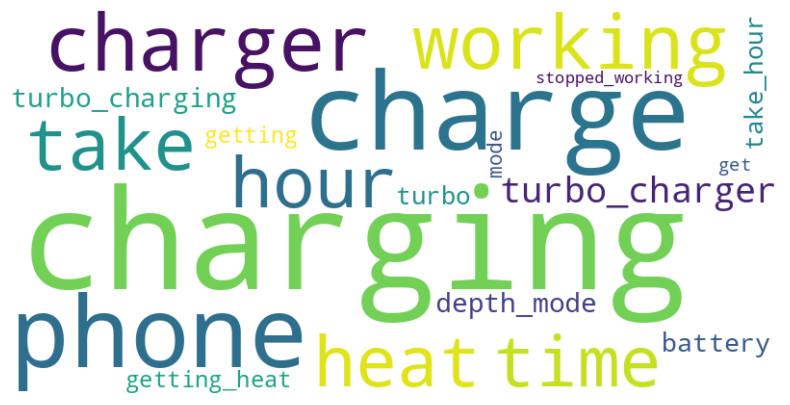

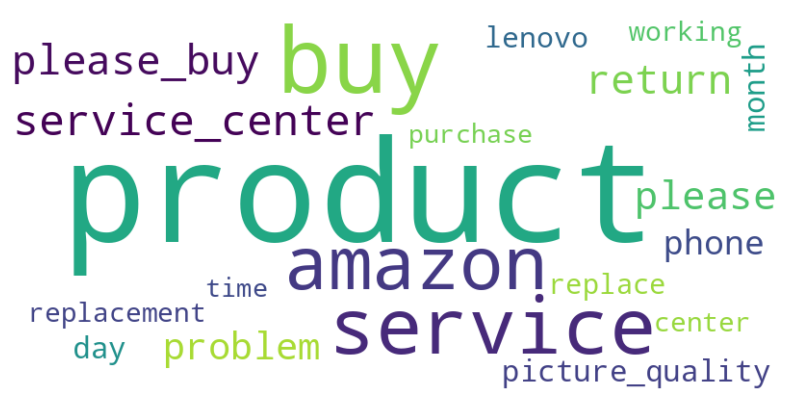

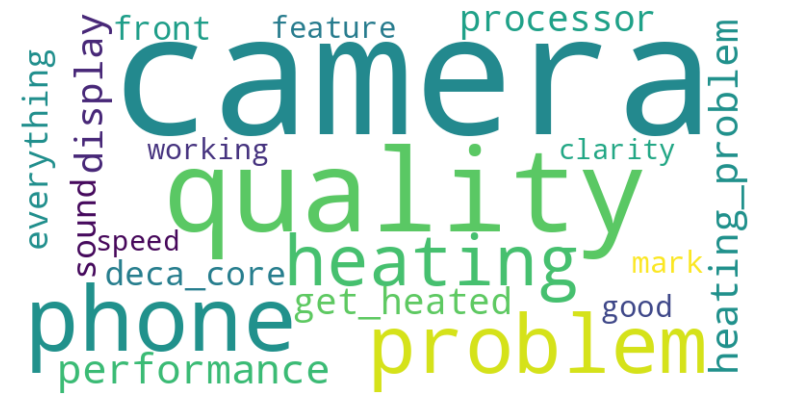

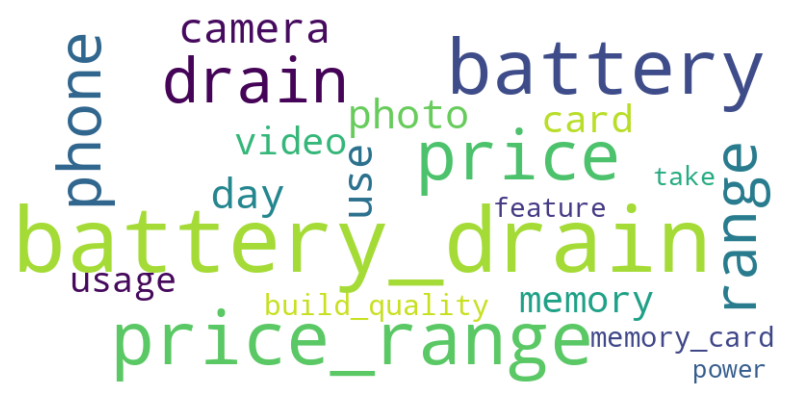

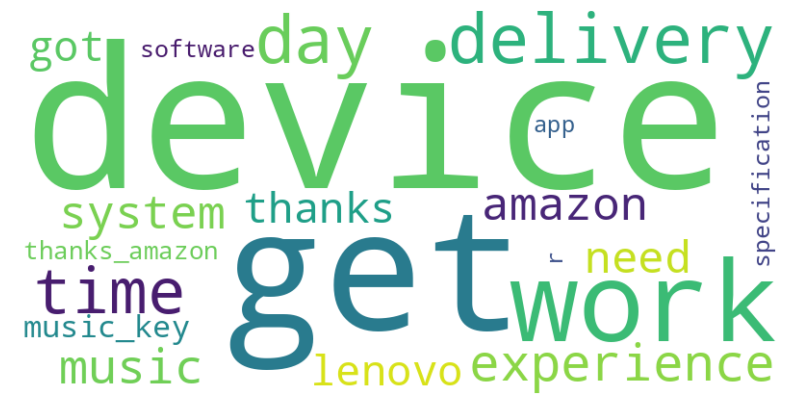

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to plot a word cloud for each topic
def plot_word_cloud(topic_keywords):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(topic_keywords)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

for i in range(5):
    topic_keywords = {word: freq for freq, word in top_topics[i][0]}
    plot_word_cloud(topic_keywords)
